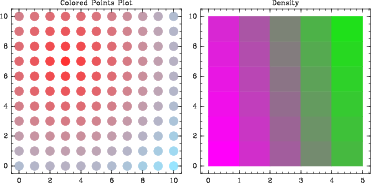

In [1]:
import biggles
from numpy import *


def mag(vec):
    return sqrt(sum(vec * vec, -1))


def make_coloredpoints_plot():

    # This is the magic recipe for an array of points from (0,0) to (10,10)
    (x, y) = reshape(indices([10 + 1, 10 + 1]), (2, -1))

    # Let's color the points by their distance from the point (3,7)
    center = (3, 7)
    rad = mag(transpose([x, y]) - center)
    scaledrad = (1 - rad / max(rad))[:, newaxis]

    # Go from light blue to intense red.
    minColor = array([0.6, 0.9, 1.0])
    maxColor = array([1.0, 0.2, 0.2])
    colorrad = minColor + scaledrad * (maxColor - minColor)

    cp = biggles.ColoredPoints(x, y, colorrad,
                               type='filled circle', size=6)

    # make plot
    p = biggles.FramedPlot()
    p.title = "Colored Points Plot"
    p.add(cp)

    return p


def make_density_plot():

    a = reshape(arange(90.0), (5, 6, 3))
    a[..., 1] = 100 - a[..., 1]

    d = biggles.Density(1 - (a / max(a.flat)), [[0, 0], [5, 10]])

    # make plot
    p = biggles.FramedPlot()
    p.title = "Density"
    p.add(d)

    return p

p1 = make_coloredpoints_plot()
p2 = make_density_plot()

t = biggles.Table(1, 2)
t.aspect_ratio = 0.5
t[0, 0] = p1
t[0, 1] = p2
t